# Exercise 4

I will use the PCA function and dataset in sklearn.  
Firstly, the data I use is MNIST.

## MNIST

In [1]:
%matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
mnist = fetch_mldata('MNIST original')

### Important function of sklearn

#### pca = PCA(0.90)  
0.90means we want to the accuracy of inversed picture and original picture is 90%  
pca = PCA() means all components are kept

#### pca.fit_transform(data)  
Use mnist.data to train PCA model and return the lowing dimension data  m

#### pca.inverse_transform(new_lower_dimension_data)  
Transform lower dimension data into original data

#### fit(X)  
Using data X to train PCA model

In [2]:
pca = PCA()
pca.fit(mnist.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### pca.explained_variance_    
represents the variance of the principal components after dimension reduction.  
The larger the variance, the more important the principal component.  

In [3]:
s = sum(pca.explained_variance_)

keep original list and reorder the variance of the principal components  
**reverse=True** means descending order  
  
The eigenvalue determines the importance of the eigenvector, and the eigenvalues need to be arranged in descending order, and the eigenvectors corresponding to the eigenvalues of the former k are taken.  

In [4]:
variance_order = [(i/s)*100 for i in sorted(pca.explained_variance_, reverse=True)] 

In [5]:
# Cumulative variance
cum_variance_order = np.cumsum(variance_order)

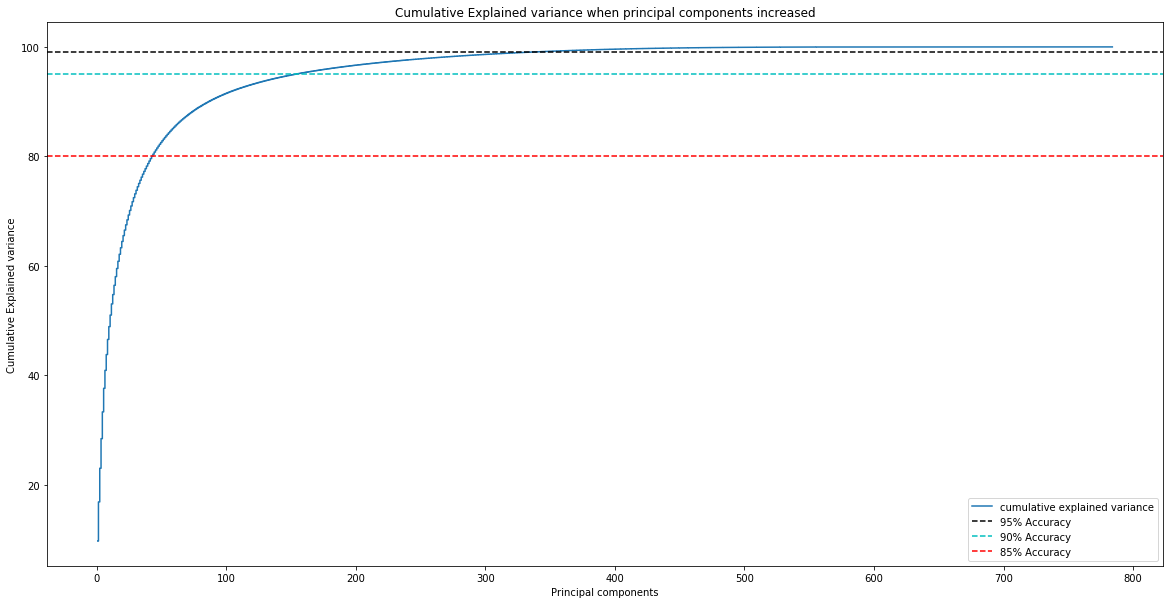

In [6]:
plt.figure(figsize=(20,10))
plt.step(range(1, 785), cum_variance_order, where='mid',label='cumulative explained variance') 
plt.xlabel('Principal components')
plt.ylabel('Cumulative Explained variance')
plt.title('Cumulative Explained variance when principal components increased')
plt.axhline(y = 99, color='k', linestyle='--', label = '95% Accuracy')
plt.axhline(y = 95, color='c', linestyle='--', label = '90% Accuracy')
plt.axhline(y = 80, color='r', linestyle='--', label = '85% Accuracy')
plt.legend(loc='best')
plt.show()

From this picture, we can find that the Cumulative Explained variance increase quickly in the beginning. Because the top components in the order are the most important components, so their variance are big. And with the number of rank increasing, the add of cumulative explained variance become less and less. The reason is that the latter rank components are not important components, they has less variance. 

Search for the cumulative components with different accuracy.  
Requirement want us show that individual images can be approximated by the sum of the first k principal.  
So kcomponents is a list with the value of k with different accuracy.  
Obviously, low accuracy needs less components.  
Attention: item should add 1, because the list begins in [0]

In [7]:
kcomponents = [np.argmax(cum_variance_order > 99)+1, 
                np.argmax(cum_variance_order > 98)+1, 
                np.argmax(cum_variance_order > 96)+1, 
                np.argmax(cum_variance_order >= 90)+1,
                np.argmax(cum_variance_order >= 85)+1,
                np.argmax(cum_variance_order >= 80)+1,
                np.argmax(cum_variance_order >= 70)+1]

In [8]:
print('99% Accuracy: Image can be approximated by the sum of the first ', 
      kcomponents[0],' principal components')
print('98% Accuracy: Image can be approximated by the sum of the first ',
      kcomponents[1],' principal components')
print('96% Accuracy: mage can be approximated by the sum of the first ', 
      kcomponents[2],' principal components')
print('90% Accuracy: mage can be approximated by the sum of the first ', 
      kcomponents[3],' principal components')
print('85% Accuracy: mage can be approximated by the sum of the first ', 
      kcomponents[4],' principal components')
print('80% Accuracy: mage can be approximated by the sum of the first ', 
      kcomponents[5],' principal components')
print('70% Accuracy: mage can be approximated by the sum of the first ' , 
      kcomponents[6],' principal components')

99% Accuracy: Image can be approximated by the sum of the first  331  principal components
98% Accuracy: Image can be approximated by the sum of the first  260  principal components
96% Accuracy: mage can be approximated by the sum of the first  179  principal components
90% Accuracy: mage can be approximated by the sum of the first  87  principal components
85% Accuracy: mage can be approximated by the sum of the first  59  principal components
80% Accuracy: mage can be approximated by the sum of the first  43  principal components
70% Accuracy: mage can be approximated by the sum of the first  26  principal components


#### Now, I will choose one picture in dataset to do the PCA analysis. 

In this function, image will dimensionality reduction by the accuracy.  
Then inverse the picture, and see how closed to the original picture.

In [9]:
from sklearn.decomposition import PCA

def explainedVariance(percentage, img): 
    pca = PCA(percentage)
    pca.fit(img)
    lower = pca.transform(img)
    inverse_lower = pca.inverse_transform(lower)
    return inverse_lower

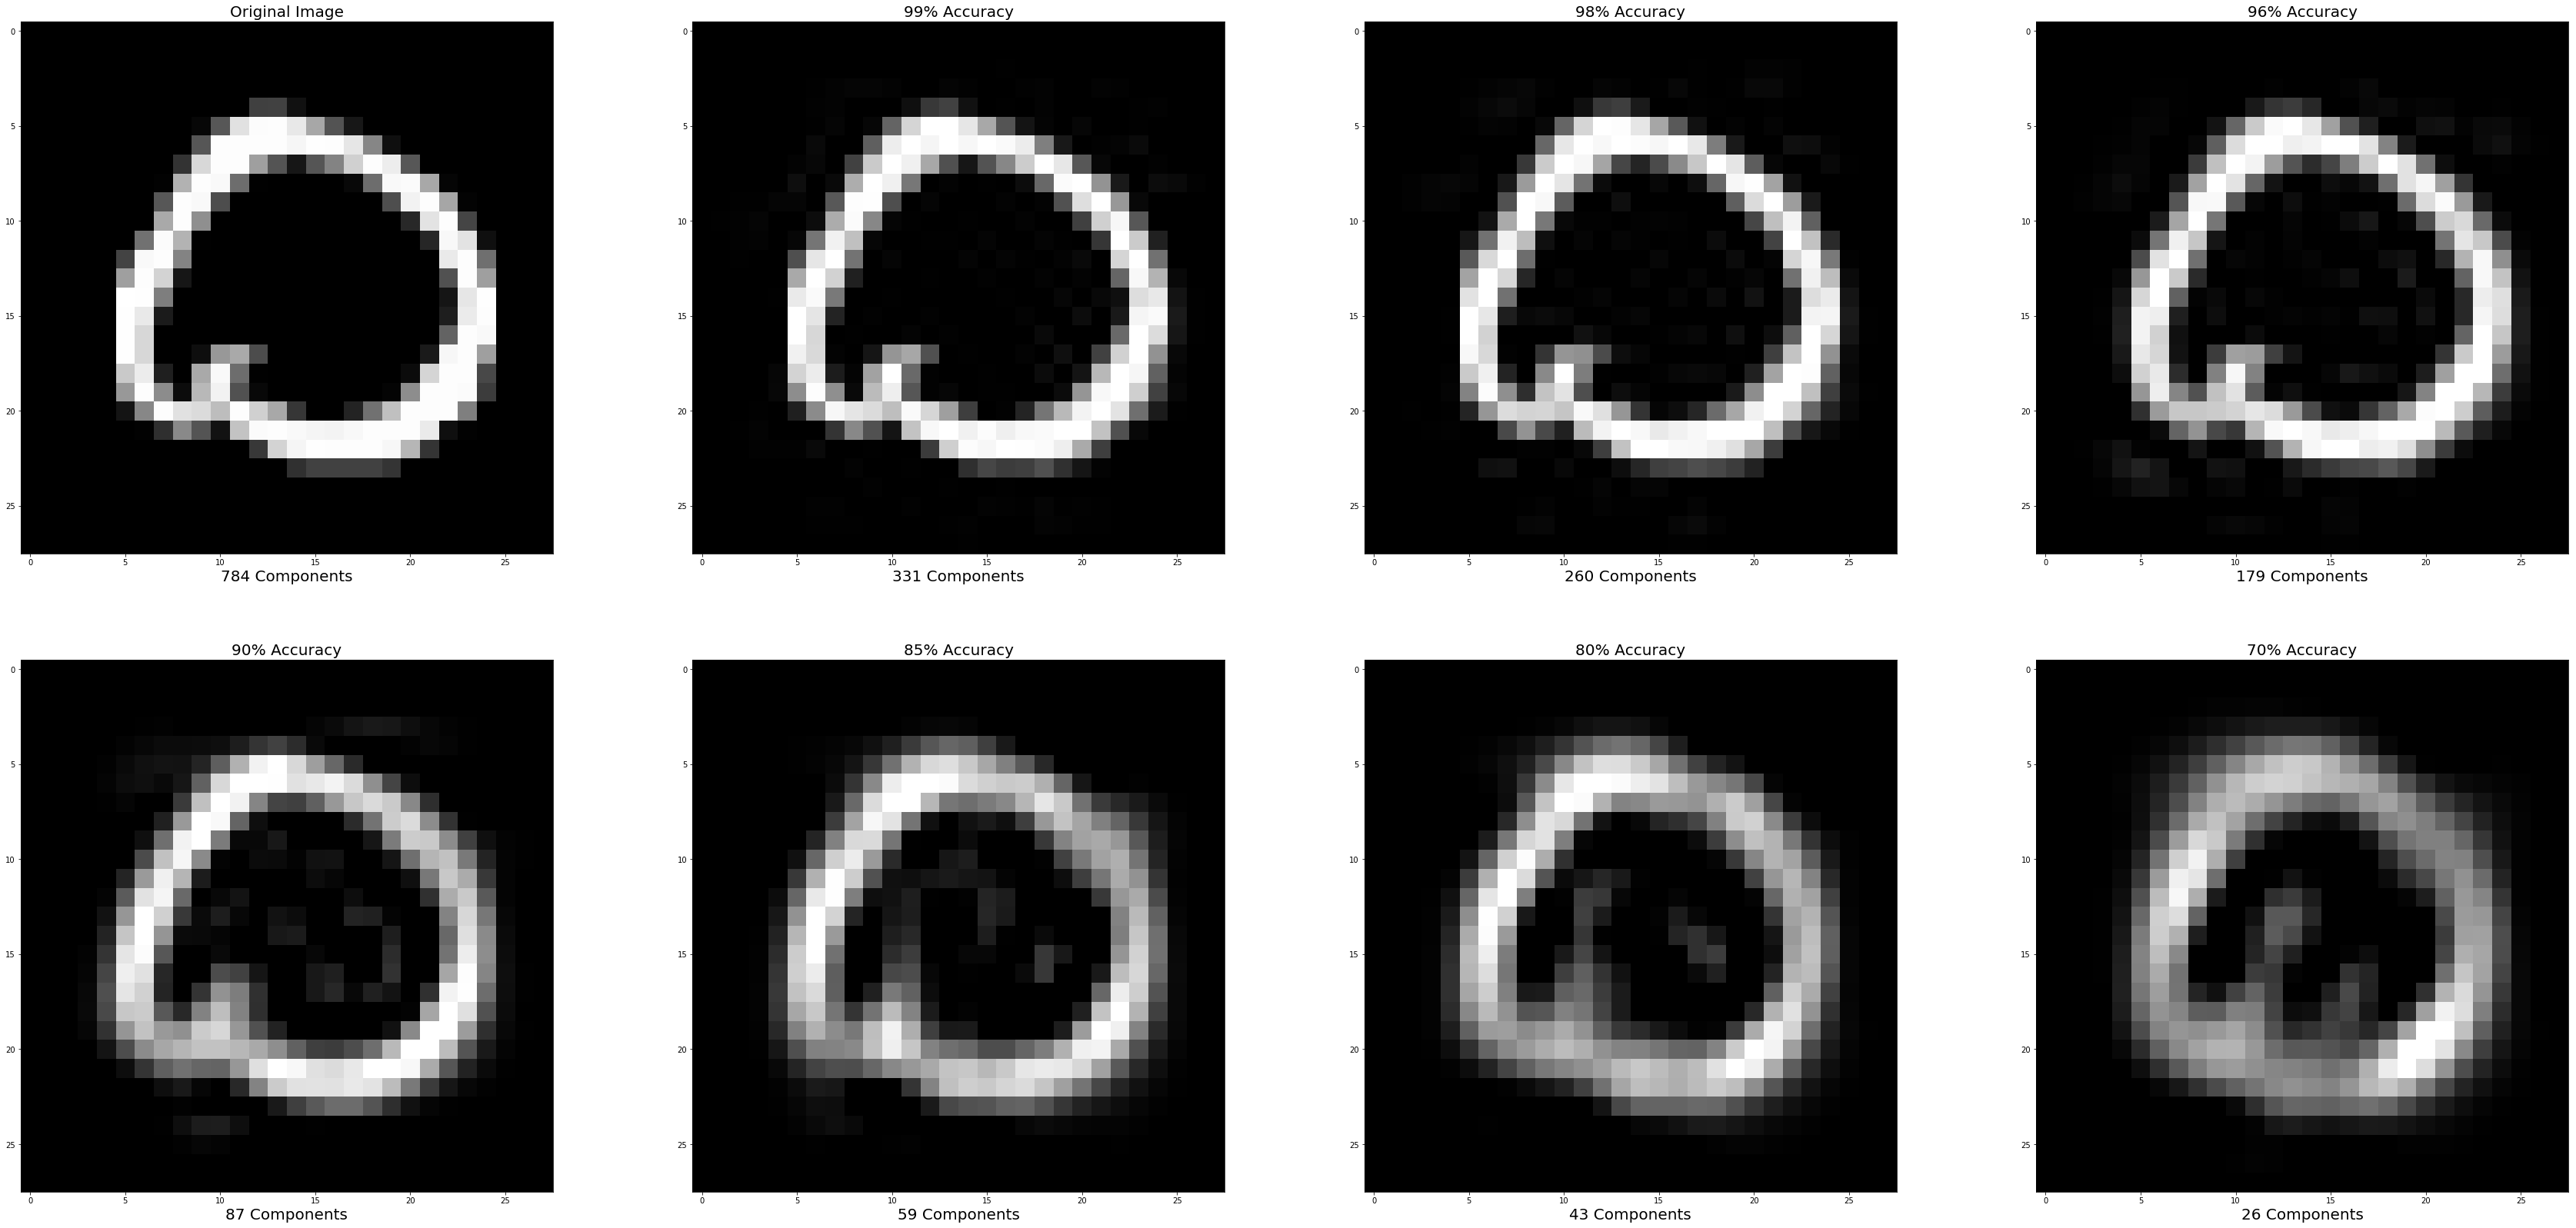

In [10]:
plt.figure(figsize=(60,28))

# Original Image (784 components)
plt.subplot(2, 4, 1)
plt.imshow(mnist.data[100].reshape(28,28),'gray',clim=(0, 255))
plt.xlabel('784 Components',fontsize = 20)
plt.title('Original Image',fontsize = 20)

# 99% Accuracy
plt.subplot(2,4,2)
plt.imshow(explainedVariance(.99, mnist.data)[100].reshape(28, 28),'gray',clim=(0, 255));
plt.xlabel('331 Components',fontsize = 20)
plt.title('99% Accuracy',fontsize = 20)

# 98% Accuracy
plt.subplot(2, 4, 3)
plt.imshow(explainedVariance(.98, mnist.data)[100].reshape(28, 28),'gray',clim=(0, 255));
plt.xlabel('260 Components',fontsize = 20)
plt.title('98% Accuracy',fontsize = 20)

# 96% Accuracy
plt.subplot(2, 4, 4)
plt.imshow(explainedVariance(.96, mnist.data)[100].reshape(28, 28),'gray',clim=(0, 255));
plt.xlabel('179 Components',fontsize = 20)
plt.title('96% Accuracy',fontsize = 20)

# 90% Accuracy
plt.subplot(2, 4, 5)
plt.imshow(explainedVariance(.90, mnist.data)[100].reshape(28, 28),'gray',clim=(0, 255));
plt.xlabel('87 Components',fontsize = 20)
plt.title('90% Accuracy',fontsize = 20)

# 85% Accuracy
plt.subplot(2, 4, 6)
plt.imshow(explainedVariance(.85, mnist.data)[100].reshape(28, 28),'gray',clim=(0, 255));
plt.xlabel('59 Components',fontsize = 20)
plt.title('85% Accuracy',fontsize = 20)

# 80% Accuracy
plt.subplot(2, 4, 7)
plt.imshow(explainedVariance(.80, mnist.data)[100].reshape(28, 28),'gray',clim=(0, 255));
plt.xlabel('43 Components',fontsize = 20)
plt.title('80% Accuracy',fontsize = 20)

# 70% Accuracy
plt.subplot(2, 4, 8)
plt.imshow(explainedVariance(.70, mnist.data)[100].reshape(28, 28),'gray',clim=(0, 255));
plt.xlabel('26 Components',fontsize = 20)
plt.title('70% Accuracy',fontsize = 20)
plt.show()

According to the results, we can see that when we select first 331, 260 and 179 components, there is little difference between 3 inversed picture. When we select first 87 components, the inversed picture becomes more blurry, but we can still figure out what number the picture is.  
  
Look the second to fourth picture, the most components we use is 331, even less than the half of 784. But they are colsed to the original picture.  
Conclusion : **Individual images can be approximated by the sum of the first k principal components.**  
The more compoents, the better inversed picture.  
In this example, I think the image can be approximated by the sum of the first 179 components.  
The components in the top are the most important components. Even if we only keep these several components, because they are very principal component and includes much important features of original picture, the inversed pictures with these components are closed to the original picture.

## Face

(400, 4096)


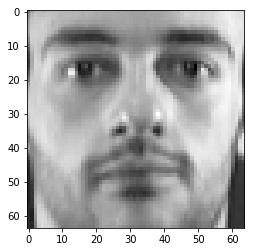

In [11]:
from sklearn.datasets import fetch_olivetti_faces 
faces = fetch_olivetti_faces(shuffle=True)
print(faces.data.shape)
plt.imshow(faces.data[6].reshape(64,64),'gray')

In [12]:
pca1 = PCA()
pca1.fit(faces.data)

s1 = sum(pca1.explained_variance_)

variance_order1 = [(i/s1)*100 for i in sorted(pca1.explained_variance_, reverse=True)]

cum_variance_order1 = np.cumsum(variance_order1)

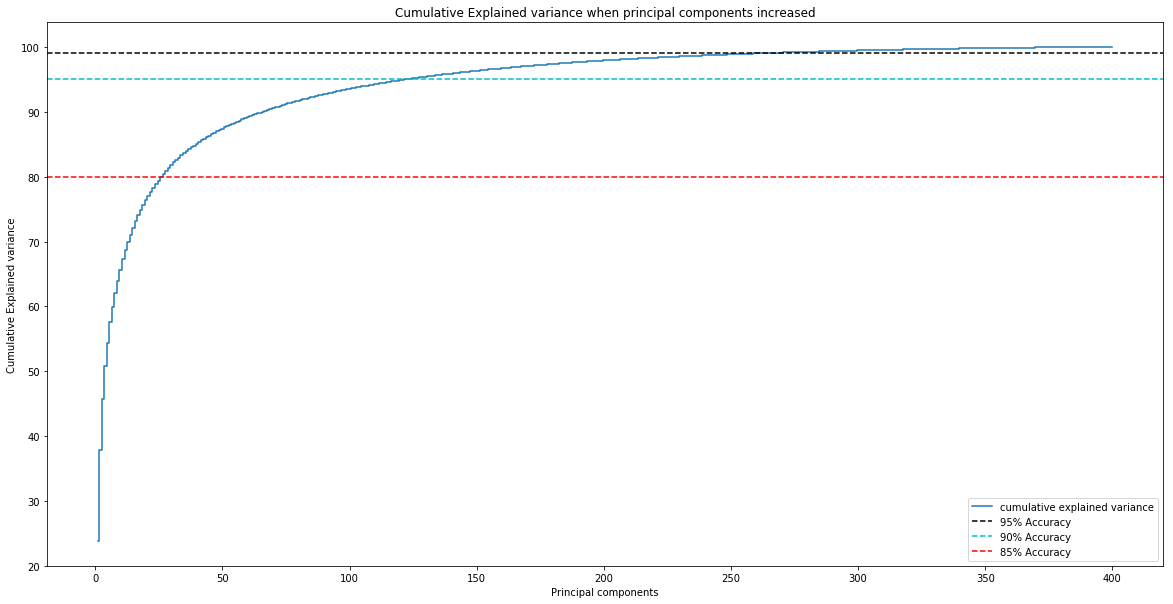

In [13]:
plt.figure(figsize=(20,10))
# 步阶图
plt.step(range(1, 401), cum_variance_order1, where='mid',label='cumulative explained variance') 
plt.xlabel('Principal components')
plt.ylabel('Cumulative Explained variance')
plt.title('Cumulative Explained variance when principal components increased')
plt.axhline(y = 99, color='k', linestyle='--', label = '95% Accuracy')
plt.axhline(y = 95, color='c', linestyle='--', label = '90% Accuracy')
plt.axhline(y = 80, color='r', linestyle='--', label = '85% Accuracy')
plt.legend(loc='best')
plt.show()

In [14]:
kcomponents1 = [np.argmax(cum_variance_order1 > 99)+1, 
                np.argmax(cum_variance_order1 > 98)+1, 
                np.argmax(cum_variance_order1 > 96)+1, 
                np.argmax(cum_variance_order1 >= 90)+1,
                np.argmax(cum_variance_order1 >= 85)+1,
                np.argmax(cum_variance_order1 >= 80)+1,
                np.argmax(cum_variance_order1 >= 70)+1]

print('99% Accuracy: Image can be approximated by the sum of the first ', 
      kcomponents1[0],' principal components')
print('98% Accuracy: Image can be approximated by the sum of the first ',
      kcomponents1[1],' principal components')
print('96% Accuracy: mage can be approximated by the sum of the first ', 
      kcomponents1[2],' principal components')
print('90% Accuracy: mage can be approximated by the sum of the first ', 
      kcomponents1[3],' principal components')
print('85% Accuracy: mage can be approximated by the sum of the first ', 
      kcomponents1[4],' principal components')
print('80% Accuracy: mage can be approximated by the sum of the first ', 
      kcomponents1[5],' principal components')
print('70% Accuracy: mage can be approximated by the sum of the first ' , 
      kcomponents1[6],' principal components')

99% Accuracy: Image can be approximated by the sum of the first  260  principal components
98% Accuracy: Image can be approximated by the sum of the first  205  principal components
96% Accuracy: mage can be approximated by the sum of the first  143  principal components
90% Accuracy: mage can be approximated by the sum of the first  66  principal components
85% Accuracy: mage can be approximated by the sum of the first  40  principal components
80% Accuracy: mage can be approximated by the sum of the first  27  principal components
70% Accuracy: mage can be approximated by the sum of the first  14  principal components


In [15]:
from sklearn.decomposition import PCA

def explainedVariance(percentage, img): 
    pca = PCA(percentage)
    pca.fit(img)
    lower = pca.transform(img)
    inverse_lower = pca.inverse_transform(lower)
    return inverse_lower

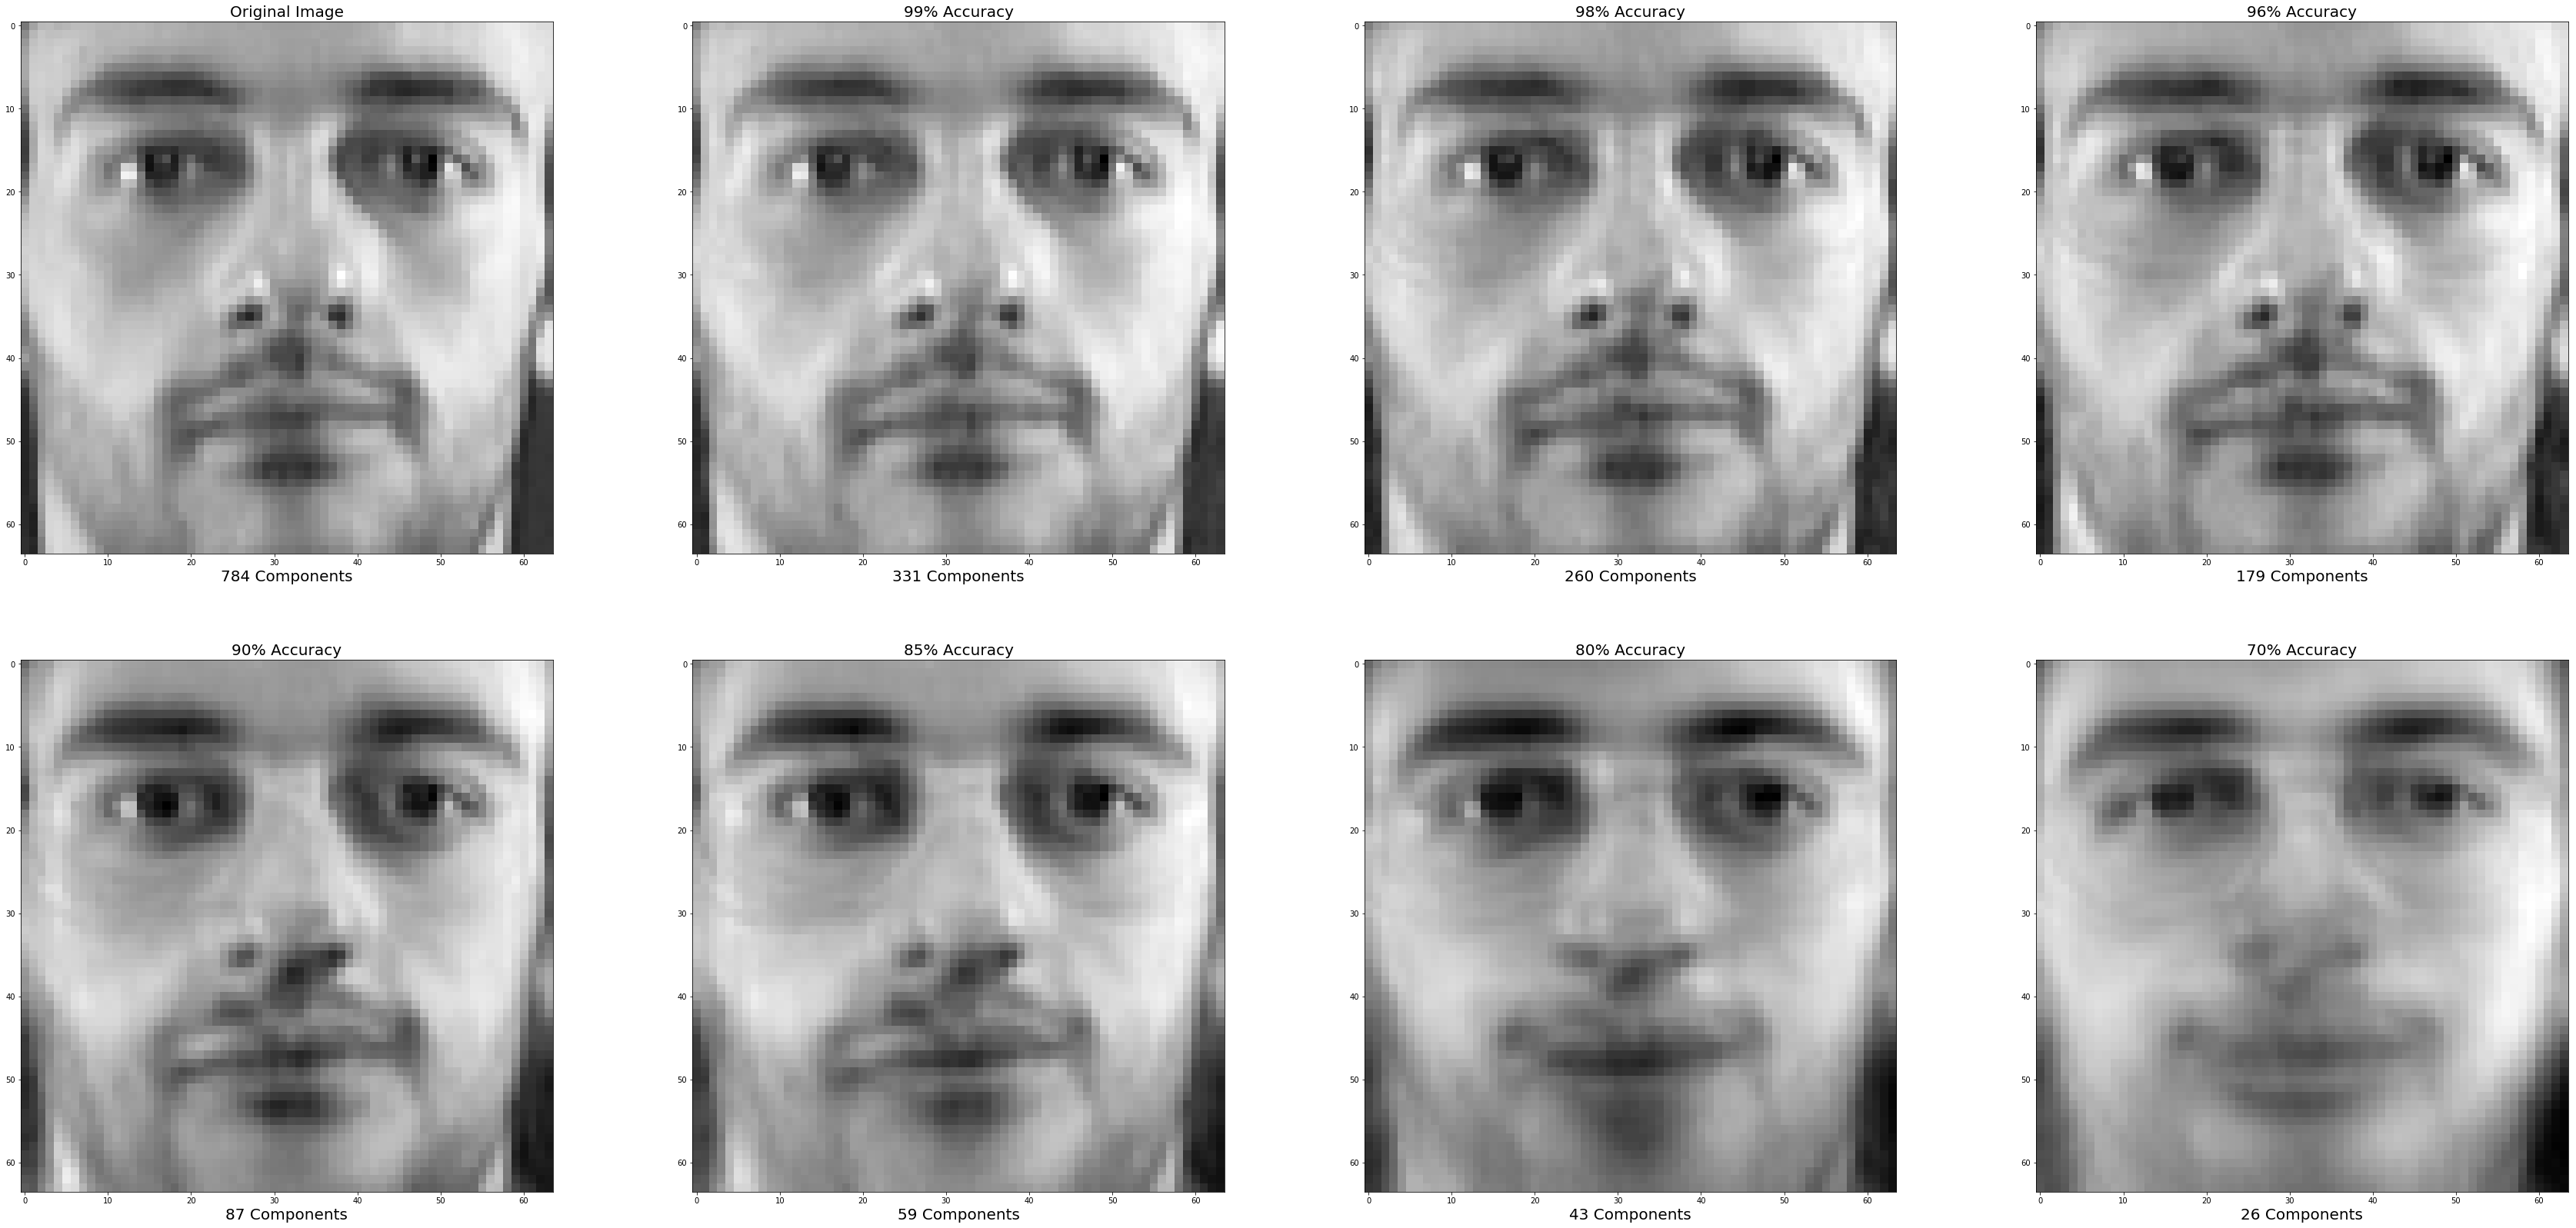

In [16]:
plt.figure(figsize=(60,28))

# Original Image (784 components)
plt.subplot(2, 4, 1)
plt.imshow(faces.data[6].reshape(64,64),'gray')
plt.xlabel('784 Components',fontsize = 20)
plt.title('Original Image',fontsize = 20)

# 99% Accuracy
plt.subplot(2,4,2)
plt.imshow(explainedVariance(.99, faces.data)[6].reshape(64,64),'gray')
plt.xlabel('331 Components',fontsize = 20)
plt.title('99% Accuracy',fontsize = 20)

# 98% Accuracy
plt.subplot(2, 4, 3)
plt.imshow(explainedVariance(.98, faces.data)[6].reshape(64,64),'gray')
plt.xlabel('260 Components',fontsize = 20)
plt.title('98% Accuracy',fontsize = 20)

# 96% Accuracy
plt.subplot(2, 4, 4)
plt.imshow(explainedVariance(.96, faces.data)[6].reshape(64,64),'gray')
plt.xlabel('179 Components',fontsize = 20)
plt.title('96% Accuracy',fontsize = 20)

# 90% Accuracy
plt.subplot(2, 4, 5)
plt.imshow(explainedVariance(.90, faces.data)[6].reshape(64,64),'gray')
plt.xlabel('87 Components',fontsize = 20)
plt.title('90% Accuracy',fontsize = 20)

# 85% Accuracy
plt.subplot(2, 4, 6)
plt.imshow(explainedVariance(.85, faces.data)[6].reshape(64,64),'gray')
plt.xlabel('59 Components',fontsize = 20)
plt.title('85% Accuracy',fontsize = 20)

# 80% Accuracy
plt.subplot(2, 4, 7)
plt.imshow(explainedVariance(.80, faces.data)[6].reshape(64,64),'gray')
plt.xlabel('43 Components',fontsize = 20)
plt.title('80% Accuracy',fontsize = 20)

# 70% Accuracy
plt.subplot(2, 4, 8)
plt.imshow(explainedVariance(.70, faces.data)[6].reshape(64,64),'gray')
plt.xlabel('26 Components',fontsize = 20)
plt.title('70% Accuracy',fontsize = 20)
plt.show()

We can see that when I use face, it still has same conclusion.  
But because faces has much more information than MNIST, so if we use less first k components, we could not figure out who is this person.  
Look at thses pictures, there is a big difference between the first one and last one.  
Back to MNIST, in the last picture, we can still figure out this is zero.  
In this example, maybe we need to use the first 280 components to appproximated the face.  
#### So different kinds of picture may be approximated by the sum of the different first k principal components.